In [13]:
#importing data manipulation libraries
import pandas as pd
import numpy as np

#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


#importing logging
import logging
logging.basicConfig(filename = 'CO2_emission_MLModel.log', level = logging.INFO,filemode='w', format = '%(asctime)s %(levelname)s %(message)s')

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
url="https://raw.githubusercontent.com/Frisk516/CO2_emission_MLModel/refs/heads/main/DATA.csv"
df=pd.read_csv(url,sep=',')
df.sample(frac=1)

,Car,Model,Volume,Weight,CO2,Unnamed: 5
3,Fiat,500,900,865,90,NaN
19,Ford,Focus,2000,1328,105,NaN
10,Hyundai,I20,1100,980,99,NaN
23,Skoda,Octavia,1600,1415,99,NaN
32,Ford,B-Max,1600,1235,104,NaN
33,BMW,2,1600,1390,108,NaN
25,Mercedes,CLA,1500,1465,102,NaN
21,Opel,Insignia,2000,1428,99,NaN
34,Opel,Zafira,1600,1405,109,NaN
15,Opel,Astra,1600,1330,97,NaN


In [15]:
df.drop(['Unnamed: 5'],axis=1,inplace=True)

In [16]:
#separating numerical and categorical data
numerical_data=df.select_dtypes(exclude=object)
categorial_data=df.select_dtypes(include=object)

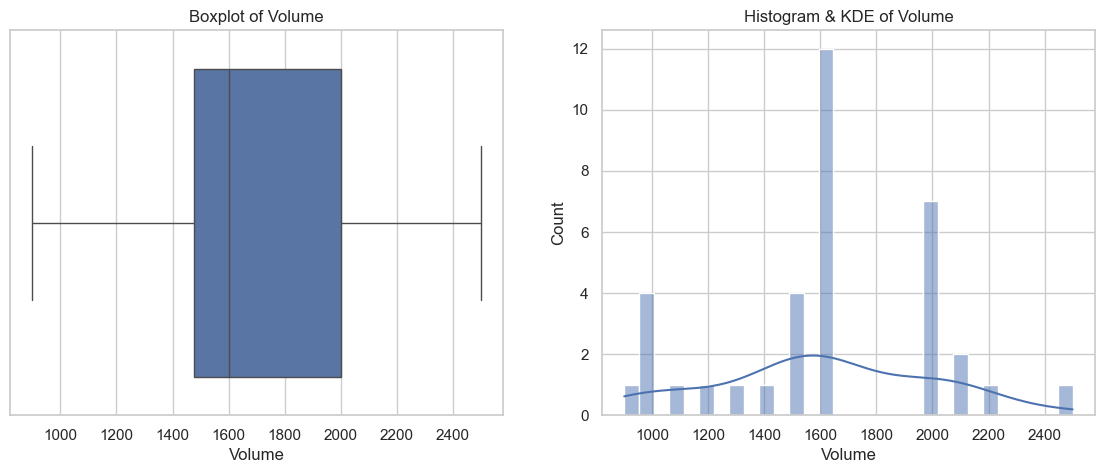

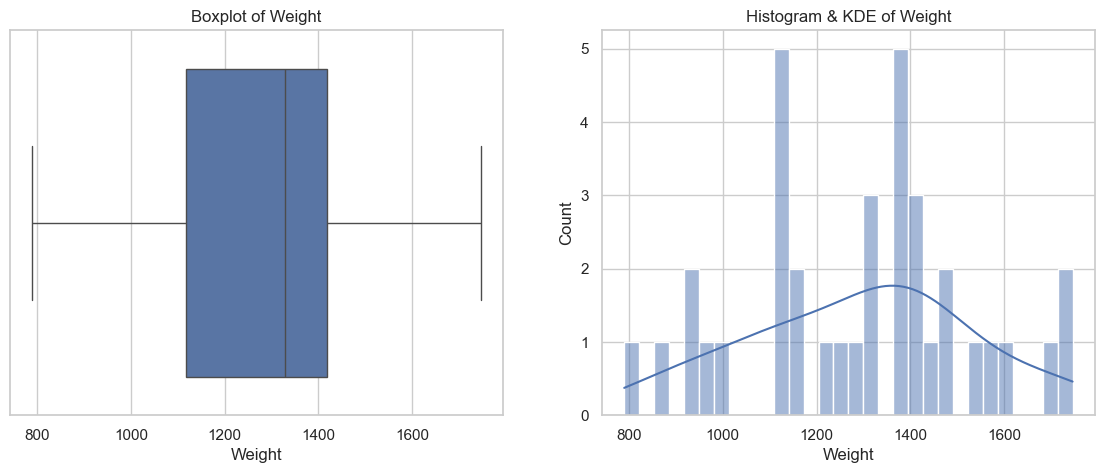

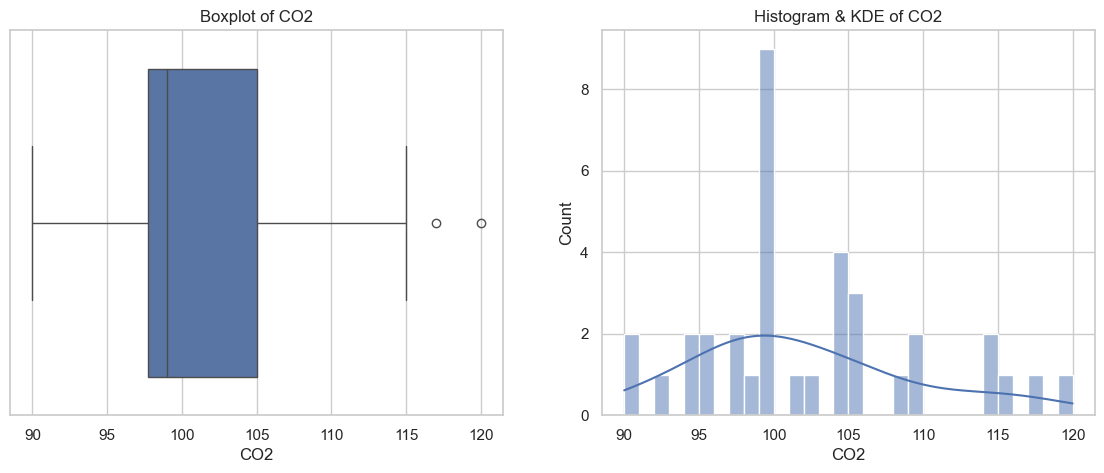

In [17]:
sns.set(style="whitegrid")

# Plot boxplots and bell curves for each numerical feature
for col in numerical_data.columns:
    plt.figure(figsize=(14, 5))
    
    # Boxplot (shows outliers as points beyond whiskers)
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    # Bell curve: histogram + KDE (to check distribution shape)
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram & KDE of {col}')
    
    plt.show()

In [18]:
#performing EDA

from collections import OrderedDict
stats=[]
for i in numerical_data:
    numerical_stats=OrderedDict({
        'feature':i,
        'mean':df[i].mean(),
        'median':df[i].median(),
        'mode':df[i].mode()[0],
        'std':df[i].std(),
        'min':df[i].min(),
        'max':df[i].max(),
        'skewness':df[i].skew(),
        'kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    report=pd.DataFrame(stats)


# Outlier Identification :
outlier_label = []
for col in report['feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,feature,mean,median,mode,std,min,max,skewness,kurtosis,Outlier Comment
0,Volume,1611.111111,1600.0,1600,388.975047,900,2500,0.016157,-0.399033,No Outliers
1,Weight,1292.277778,1329.0,1365,242.123889,790,1746,-0.116137,-0.464196,No Outliers
2,CO2,102.027778,99.0,99,7.454571,90,120,0.656440,-0.005159,Has Outliers


In [19]:
#encoding car and model with labelencoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Car']=le.fit_transform(df['Car'])
df['Model']=le.fit_transform(df['Model'])

In [20]:
#train test split to prevent data leak

from sklearn.model_selection import train_test_split
X=df.drop('CO2',axis=1)
y=df['CO2']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [21]:
df.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

In [22]:
#data has some outliers so we will be using minmax scaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
#using linear regression

from sklearn.linear_model import LinearRegression

LR=LinearRegression()

LR.fit(X_train,y_train)

y_pred_LR=LR.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2_score_LR=r2_score(y_test,y_pred_LR)
r2_score_LR

-1.0430308522122935

In [24]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()

RF.fit(X_train,y_train)

y_pred_RF=RF.predict(X_test)

r2_score_RF = r2_score(y_test,y_pred_RF)
print(f'The R2 Score for ',r2_score_RF)

The R2 Score for  -0.7240659053156155


In [25]:
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor()

DT.fit(X_train,y_train)

y_pred_DT=DT.predict(X_test)

r2_score_DT=r2_score(y_test,y_pred_DT)
r2_score_DT

-2.0195182724252487

In [26]:
import xgboost as xgb

XGB = xgb.XGBRegressor()

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)

r2_score_XGB = r2_score(y_test, y_pred_XGB)

print(f'The R2 Score for XGBoost Model: {r2_score_XGB}')

The R2 Score for XGBoost Model: -1.3655519485473633


In [27]:
from sklearn.ensemble import AdaBoostRegressor
ADA=AdaBoostRegressor()

ADA.fit(X_train, y_train)

y_pred_ADA = ADA.predict(X_test)

r2_score_ADA = r2_score(y_test, y_pred_ADA)

print(f'The R2 Score for AdaBoost Model: {r2_score_ADA}')

The R2 Score for AdaBoost Model: -0.5013583346859329


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define model and parameter grid
model=RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [25,50,100, 200, 300, 400,500],'max_depth': [None, 10,20,30,40,50]}

#Grid Search Cv
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

#print result
print('Best Parameters:', grid_search.best_params_)
print('R2 Score:', r2_score(y_test, y_pred))

Best Parameters: {'max_depth': None, 'n_estimators': 50}
R2 Score: -0.772600664451828


In [ ]:
#reason for negative score unknown,will update
